In [1]:
from pyur5.models.ens_model import EnsembleModel
import pickle
import numpy as np
import matplotlib.pyplot as plt

2023-06-07 15:34:47.637426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = EnsembleModel()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


use_cos:  True
obs_min [ -1.          -1.         -47.36460835  -0.45103486   0.61612155
  -1.34920692  -0.87231532]
obs_max [  1.           1.         113.19738345   0.18051564   0.77174841
   1.41389114   0.73064812]
action_min [-1. -1.]
action_max [1. 1.]


/home/bizoffermark/anaconda3/envs/ode/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [3]:
with open("/home/bizoffermark/workspace/ode/pyur5/pyur5/data_pkl/data_new_1.0_1_True.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
x_init = data['states'][0]

In [18]:
u = np.array([1.0, 1.0])
n_steps = 100


In [19]:
x = x_init
xs = []
for i in range(n_steps):
    next_x, *others = model.step(x, u)
    xs.append(next_x)
    x = next_x

u before step:  (2,)
x before step:  (7,)
metadata:  {'mu_x': array([ 0.03769052,  0.00727614,  0.04966696, -0.1034425 ,  0.68760483,
       -0.00401098, -0.00845169,  0.00869711, -0.02961862]), 'std_x': array([0.69215675, 0.72072569, 5.79415275, 0.1813669 , 0.04239349,
       0.48843331, 0.17858   , 0.64477007, 0.60282488]), 'mu_y': array([-2.04263116e-04, -1.34334454e-04, -2.53255454e-03,  1.99653098e-05,
        7.29925608e-06, -1.80088491e-04, -1.14283145e-04]), 'std_y': array([0.06821709, 0.06829043, 1.49586893, 0.0084473 , 0.00329497,
       0.07532686, 0.04925072]), 'min_x': array([ -1.        ,  -1.        , -47.36460835,  -0.45103486,
         0.61612155,  -1.34920692,  -0.87231532,  -1.        ,
        -1.        ]), 'max_x': array([  1.        ,   1.        , 113.19738345,   0.18051564,
         0.77174841,   1.41389114,   0.73064812,   1.        ,
         1.        ])}
xu after normalize:  [ 1.3902199  -0.02522232 -0.12146971 -0.146416    0.00934137  0.00821192
  0.047327

In [20]:
pos_idxs = [3, 4]

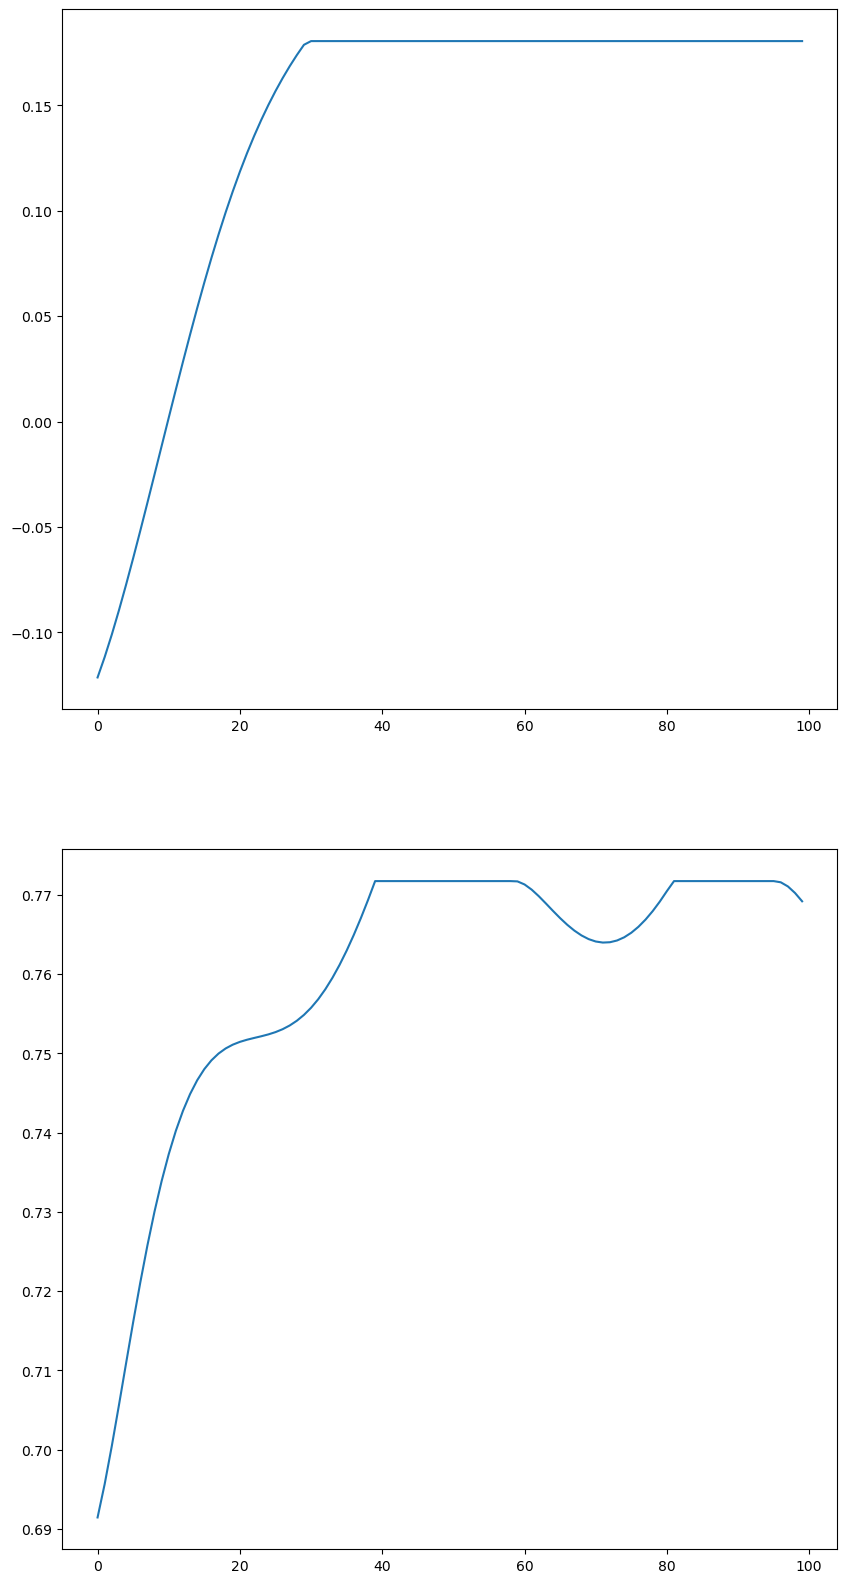

In [21]:
# make subplot of xs
xs = np.array(xs)
fig, axs = plt.subplots(len(pos_idxs), 1, figsize=(10, 20))
for i, j in enumerate(pos_idxs):
    axs[i].plot(xs[:,j])
plt.show()

In [9]:
xs.max(0)[pos_idxs]

array([-0.1374052 ,  0.68740326], dtype=float32)

In [10]:
xs.min(0)[pos_idxs]

array([-0.45103487,  0.6385214 ], dtype=float32)

In [11]:
with open("/home/bizoffermark/workspace/ode/pyur5/pyur5/metadata/metadata_new_1.0_True.pkl", "rb") as f:
    metadata = pickle.load(f)

In [12]:
metadata['min_x'][pos_idxs]

array([-0.45103486,  0.61612155])

In [13]:
metadata['max_x'][pos_idxs]

array([0.18051564, 0.77174841])